In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
lectura= pd.read_csv("datosConcatenadossinCI.csv")

Visualizamos los datos primero

In [119]:
lectura.head(10)

,Unnamed: 0,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,...,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,Tercer.Par,Asis,Cuarto.Par,4P_60,id_anony
0,0,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,0,0,0,0,NaN,0.0,1.0,NaN,NaN,es_0
1,1,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,14,8,0,0,1F-5,0.0,1.0,NaN,NaN,es_1
2,2,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,23,9,0,0,1F-5,0.0,1.0,NaN,NaN,es_2
3,3,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,14,8,0,0,"1F-1,2F-2",0.0,1.0,NaN,NaN,es_3
4,4,2012,1,2402,COMBUSTION,MEC9-OPT,13,1,2012,1,...,4,8,0,0,NaN,0.0,1.0,NaN,NaN,es_4
5,5,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,21,7,0,0,1F-4,0.0,1.0,NaN,NaN,es_5
6,6,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,31,9,0,0,1F-3,0.0,1.0,NaN,NaN,es_6
7,7,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,29,8,0,0,1F-5,0.0,1.0,NaN,NaN,es_7
8,8,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,26,8,0,0,1F-5,0.0,1.0,NaN,NaN,es_8
9,9,2012,1,2402,COMBUSTION,INT9MECANI,13,1,2012,1,...,15,9,0,0,1F-3,0.0,1.0,NaN,NaN,es_9




ANALIZAMOS LOS CODIGO DE CARRERAS


In [120]:
np.unique(lectura["Cod.Car.Sec"])

array(['CGF-175-09', 'CGF-PLS09 ', 'CGF-PLS13 ', 'CIV-175-09',
       'CIV-PLS09 ', 'CIV-PLS13 ', 'ECA-175-09', 'ECA-PLS09 ',
       'ECA-PLS13 ', 'ECA9-OPT  ', 'ELE-175-09', 'ELE-PLS09 ',
       'ELE-PLS13 ', 'IND-175-09', 'IND-PLS09 ', 'IND-PLS13 ',
       'INT9-PROYT', 'INT9CONSTR', 'INT9ELECTR', 'INT9G-ECO ',
       'INT9MECANI', 'INT9ORTERR', 'INT9RNYMA ', 'INT9SANEHI',
       'INT9SDIGYT', 'INT9TRANSP', 'MCT-175-09', 'MCT-PLS09 ',
       'MCT-PLS13 ', 'MCT9-OPT  ', 'MEC-175-09', 'MEC-PLS09 ',
       'MEC-PLS13 ', 'MEC9-OPT  ', 'TIVAS     '], dtype=object)

In [121]:
eca=pd.DataFrame(columns=lectura.columns)
for car in ['ELE-PLS13 ','ELE-175-09', 'ELE-PLS09 ']:
     eca=pd.concat([eca, lectura[lectura["Cod.Car.Sec"]==car]], axis=0)

In [122]:
np.unique(eca["Cod.Car.Sec"])

array(['ELE-175-09', 'ELE-PLS09 ', 'ELE-PLS13 '], dtype=object)

In [123]:
primerS=eca[ (eca["Cod.Curso"]==4) & (eca["Aprobado"]=="S")]
CprimerS=np.unique(primerS["Asignatura"])
CprimerS

array(['CALCULO 4', 'CALCULO 5', 'DINAMICA', 'FISICA 4',
       'MECANICA DE MATERIALES 1'], dtype=object)

In [124]:
newdata=pd.DataFrame(columns=eca.columns)
for mat in ['CALCULO 4', 'CALCULO 5', 'DINAMICA', 'FISICA 4',
       'MECANICA DE MATERIALES 1']:
    newdata=pd.concat([newdata, eca[eca["Asignatura"]==mat]], axis=0)
    print(mat)
print('Cantidad de elementos',newdata.shape)



CALCULO 4
CALCULO 5
DINAMICA
FISICA 4
MECANICA DE MATERIALES 1
Cantidad de elementos (6140, 23)


In [125]:
df=newdata[newdata["Aprobado"]=="S"]
print('Cantidad de elementos',df.shape)

Cantidad de elementos (2874, 23)


In [126]:
estudiantes=np.unique(df['id_anony'])
materias=np.unique(df['Asignatura'])
print(len(estudiantes))

713


In [127]:
Alumnos=[]
Alumnos.clear()
Inicio=[]
Inicio.clear()
Duracion=[]
Duracion.clear()

In [128]:
for ides in estudiantes:
    registro=df[df.id_anony.values==ides]
    regis=eca[eca.id_anony.values==ides]
    cant=np.unique(registro["Asignatura"])
    a=np.sum(cant=='CALCULO 4')
    a=a+np.sum(cant=='CALCULO 5')
    a=a+np.sum(cant=='DINAMICA')
    a=a+np.sum(cant=='FISICA 4')
    a=a+np.sum(cant=='MECANICA DE MATERIALES 1')
    regi=np.sum((regis["Cod.Curso"].values==1))
    if (a==5)&(regi>0):
        ides
        AnhoIn=min(regis["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)
        #print(ides,Tiempo)

In [129]:
Datos=pd.DataFrame({'Alumnos':Alumnos,'Ingreso':Inicio,'Duracion':Duracion})
Datos

,Alumnos,Ingreso,Duracion
0,es_1120,2012,6
1,es_1243,2012,4
2,es_1261,2012,4
3,es_1298,2013,3
4,es_1301,2012,6
...,...,...,...
246,es_4040,2018,2
247,es_4084,2018,2
248,es_4101,2018,2
249,es_4179,2018,2


In [130]:
DatosIngreso=Datos[ (Datos["Ingreso"]>=2012) & (Datos["Ingreso"]<=2015)]
DatosIngreso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 250
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Alumnos   204 non-null    object
 1   Ingreso   204 non-null    int64 
 2   Duracion  204 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ KB


In [131]:
x=DatosIngreso.iloc[:,1].values
X=x.reshape(-1, 1)
y=DatosIngreso.iloc[:,2].values

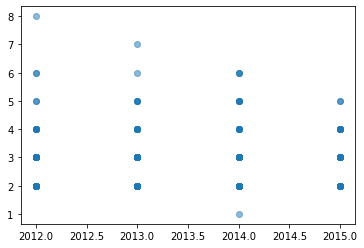

In [132]:
plt.scatter(x,y,alpha=0.5)
plt.show()

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.1)
print("Train Data shape: " + str(X_train.shape))  
print("test Data shape: " + str(X_test.shape))
print("Train labels shape: " + str(Y_train.shape))  
print("test labels shape: " + str(Y_test.shape))

Train Data shape: (183, 1)
test Data shape: (21, 1)
Train labels shape: (183,)
test labels shape: (21,)


In [135]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [136]:
R_sq=lm.score(X_train,Y_train)
print('Coeficiente de determinacion',R_sq)
print('b0:',lm.intercept_)
print('b1:',lm.coef_)

Coeficiente de determinacion 0.0004075996767485268
b0: 45.505570625847874
b1: [-0.0210715]


In [137]:
prediccion = lm.predict(X_test)
prediccion

array([3.10971711, 3.10971711, 3.10971711, 3.10971711, 3.08864561,
       3.06757411, 3.10971711, 3.04650262, 3.06757411, 3.06757411,
       3.10971711, 3.04650262, 3.08864561, 3.08864561, 3.04650262,
       3.10971711, 3.08864561, 3.10971711, 3.08864561, 3.10971711,
       3.04650262])

In [138]:
np.mean(prediccion)

3.086638802004032

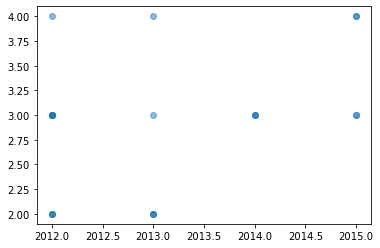

In [139]:
plt.scatter(X_test,Y_test,alpha=0.5)
plt.show()

In [140]:
eca=pd.DataFrame(columns=lectura.columns)
for car in ['ELE-PLS13 ','ELE-175-09', 'ELE-PLS09 ']:
     eca=pd.concat([eca, lectura[lectura["Cod.Car.Sec"]==car]], axis=0)

In [141]:
eca=eca[eca["Cod.Curso"]<5]

In [142]:
daf=eca[(eca["Aprobado"]=="S")|(eca["Aprobado"]=="N") ]

In [143]:
estudiantes=np.unique(daf['id_anony'])
materias=np.unique(daf['Asignatura'])
print(len(estudiantes))

1324


In [144]:
Alumnos=[]
Alumnos.clear()
Inicio=[]
Inicio.clear()
Duracion=[]
Duracion.clear()
Aprobado=[]
Aprobado.clear()
Mate=[]
Mate.clear()
for ides in estudiantes:
    registro=daf[daf.id_anony.values==ides]
    cant=np.unique(registro["Asignatura"])
    a=np.sum(cant=='CALCULO 4')
    a=a+np.sum(cant=='CALCULO 5')
    a=a+np.sum(cant=='DINAMICA')
    a=a+np.sum(cant=='FISICA 4')
    a=a+np.sum(cant=='MECANICA DE MATERIALES 1')
    regi=np.sum((registro["Cod.Curso"].values==1))
    pasadas=registro[registro["Aprobado"]=="S"]
    pasadas=np.unique(registro["Asignatura"])
    if regi>0:
      if (a==5):
        AnhoIn=min(registro["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)
        Aprobado.append(1)
        Mate.append(len(pasadas))

      else :
        AnhoIn=min(registro["danho"])
        AnhoFin=max(registro["danho"])
        Tiempo=AnhoFin-AnhoIn
        Alumnos.append(ides)
        Duracion.append(Tiempo)
        Inicio.append(AnhoIn)
        Aprobado.append(0)
        Mate.append(len(pasadas))
    

In [145]:
DatosP=pd.DataFrame({'Alumnos':Alumnos,'Ingreso':Inicio,'Duracion':Duracion,'Materias':Mate,'CB Fin':Aprobado})
DatosP.head(50)

,Alumnos,Ingreso,Duracion,Materias,CB Fin
0,es_0,2012,2,2,0
1,es_1103,2012,0,5,0
2,es_1117,2012,3,9,0
3,es_1120,2012,6,17,1
4,es_1143,2012,5,11,0
5,es_1150,2012,4,11,0
6,es_1151,2012,6,17,0
7,es_1170,2012,5,20,0
8,es_1174,2013,1,9,0
9,es_1198,2012,5,16,1


In [146]:
DatosPL=DatosP[ (DatosP["Ingreso"]>=2012) & (DatosP["Ingreso"]<=2015)]
DatosPL.head(50)

,Alumnos,Ingreso,Duracion,Materias,CB Fin
0,es_0,2012,2,2,0
1,es_1103,2012,0,5,0
2,es_1117,2012,3,9,0
3,es_1120,2012,6,17,1
4,es_1143,2012,5,11,0
5,es_1150,2012,4,11,0
6,es_1151,2012,6,17,0
7,es_1170,2012,5,20,0
8,es_1174,2013,1,9,0
9,es_1198,2012,5,16,1


In [147]:
x=DatosPL.iloc[:,1].values
X=x.reshape(-1, 1)
y=DatosPL.iloc[:,4].values

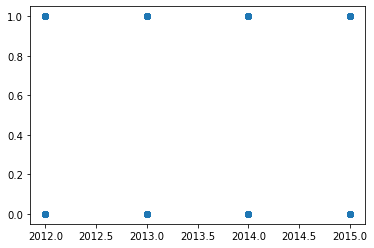

In [148]:
plt.scatter(X,y,alpha=0.5)
plt.show()

In [149]:
X=DatosP[['Ingreso','Duracion','Materias']].values

In [150]:
Y=DatosP['CB Fin'].values

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [162]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)
print("Train Data shape: " + str(X_train.shape))  
print("test Data shape: " + str(X_test.shape))
print("Train labels shape: " + str(Y_train.shape))
print("test labels shape: " + str(Y_test.shape))

Train Data shape: (701, 3)
test Data shape: (176, 3)
Train labels shape: (701,)
test labels shape: (176,)


In [163]:
log_regression=LogisticRegression()

In [164]:
log_regression.fit(X_train,Y_train)

LogisticRegression()

In [165]:
Y_pred=log_regression.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [166]:
print('La cantidad de alumnos:',Y_pred.shape)
nP=np.sum(Y_pred[:]==0)
print('Alumnos que no aprobaran:',nP)
P=np.sum(Y_pred[:]==1)
print('Alumnos que aprobaran:',P)

La cantidad de alumnos: (176,)
Alumnos que no aprobaran: 93
Alumnos que aprobaran: 83


In [167]:
matrix_confu=metrics.confusion_matrix(Y_test,Y_pred)
matrix_confu

array([[82, 15],
       [11, 68]])

In [168]:
dataframe=pd.DataFrame(matrix_confu)

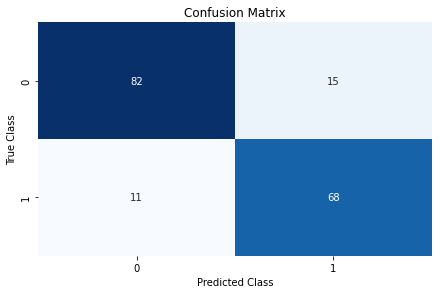

In [169]:
sns.heatmap(dataframe,annot=True,cbar=None,cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"),plt.xlabel("Predicted Class")
plt.show()

In [170]:
print("Precision del modelo:",metrics.accuracy_score(Y_test,Y_pred))

Precision del modelo: 0.8522727272727273
